# [Statistics]  ANOVA with Python library

### ANOVA introduction

< Introduction >

The F-test is commonly used in various statistical analyses, including comparing the variances of two groups, assessing the adequacy of regression models, and conducting analysis of variance (ANOVA) tests.

It helps determine if the differences in variances observed in the samples are likely due to chance or if they are statistically significant.

- In a one-tailed F-test, the hypotheses are formulated to test for a specific directional difference or relationship between the groups or populations. 
- In two-tailed F-test, the hypotheses are formulated to test for any significant difference or relationship between the groups or populations, regardless of the direction

In the context of ANOVA, the F-value or F-statistic are obtained from the F-test is indeed used to perform the one-way ANOVA test. It helps assess the significance of the differences between the means of multiple groups. The F-value is compared to a critical value or p-value to determine if there are statistically significant differences among the group means.

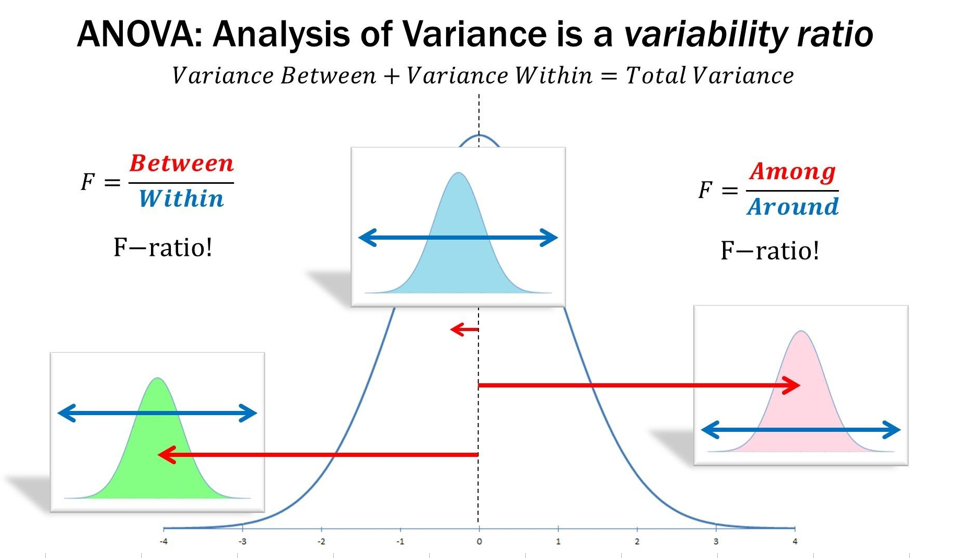

In [1]:
####

In [2]:
import numpy as np
import scipy.stats as stats
 
# Generate 25 samples
x = np.round(np.random.rand(25)* 100)

# Randomly group the data into 10 groups
num_groups = 5
group_labels = np.random.randint(0, num_groups, size=len(x))

# Calculate the group means
group_means = []
for i in range(num_groups):
    group_means.append(np.mean(x[group_labels == i]))
    
# Calculate the overall mean
overall_mean = np.mean(x)

In [3]:
# Calculate the sum of squares between groups
SSB = np.sum([len(x[group_labels == i]) * (group_means[i] - overall_mean)**2 for i in range(num_groups)])
 
# Calculate the degrees of freedom between groups
df_between = num_groups - 1
# Calculate the degrees of freedom with in groups
df_within = len(x)-num_groups

# Calculate the mean square between groups
MSB = SSB / df_between

# Calculate the sum of squares within groups
SSW = 0
for i in range(num_groups):
    group_samples = x[group_labels == i]
    SSW += np.sum((group_samples - group_means[i])**2)
    
MSW = SSW / df_within
 
# Calculate the F-value
F_value = MSB / MSW

In [4]:
# Degree of Freedom
print('Degree of Freedom between groups',df_between)
print('Degree of Freedom within groups',df_within)

Degree of Freedom between groups 4
Degree of Freedom within groups 20


In [5]:
# Print the F-value
print("F-value:", F_value)

F-value: 0.8379581263618919


In [6]:
# Set the significance level
alpha = 0.05
 
# Calculate the F-value using Percent point function (inverse of cdf)
f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

# Print the F-critical
print("F-critical:", f_critical)

F-critical: 2.8660814020156584


In [7]:
# Check the hypothesis
if F_value > f_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


#### ANOVA using scipy.stats

In [11]:
# Importing library
from scipy.stats import f_oneway
 
# Performance when each of the engine 
# oil is applied
group1 = x[group_labels == 1]
group2 = x[group_labels == 2]
group3 = x[group_labels == 3]
group4 = x[group_labels == 4]
group5 = x[group_labels == 0]
 
# Conduct the one-way ANOVA
f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=0.8379581263618916, pvalue=0.5171943259741423)